In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Universities.csv')

In [3]:
data.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
data.isnull().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [6]:
data.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [7]:
data1 = data.iloc[:,1:].copy()

In [8]:
data1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [9]:
val = data1.corr()

<AxesSubplot:>

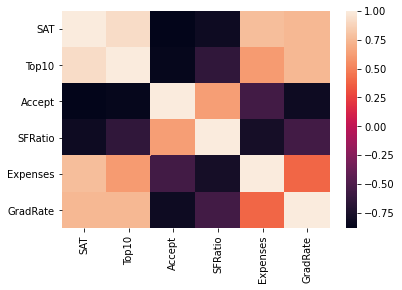

In [10]:
sns.heatmap(val)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1 = scaler.fit_transform(data1)

In [12]:
val = pd.DataFrame(data1)

In [13]:
val

,0,1,2,3,4,5
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


In [14]:
cols = data.columns
cols = cols.delete(0)

In [15]:
cols

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [16]:
val.columns = cols

In [17]:
val.tail()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
20,-0.814162,-0.602901,1.490010,0.823051,-0.843248,-0.193808
21,0.174813,0.184862,-0.165557,-0.431600,0.011674,0.369587
22,-0.390316,0.027309,0.248335,0.321191,-0.993318,0.594945
23,-1.708950,-1.915840,1.541746,0.572121,-1.098883,-1.771313
24,1.022507,0.972625,-1.045076,-0.431600,1.140982,1.045661


In [18]:
val.describe().head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01
mean,-5.151435e-16,-2.176037e-16,-1.598721e-16,-2.109424e-16,0.000000,1.687539e-16
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621,1.020621e+00
min,-2.462455e+00,-2.546050e+00,-1.303758e+00,-1.686251e+00,-1.321971,-2.222029e+00
25%,-2.490335e-01,-1.302435e-01,-7.863939e-01,-4.315999e-01,-0.866597,-6.445235e-01


In [19]:
cluster = KMeans(3,random_state =0)
cluster.fit(val)

KMeans(n_clusters=3, random_state=0)

In [20]:
cluster.labels_

array([1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 2])

In [21]:
set(cluster.labels_)

{0, 1, 2}

In [22]:
data['ClusterId'] = cluster.labels_

In [23]:
data.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,ClusterId
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1


In [24]:
data.iloc[:,1:].groupby("ClusterId").mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
ClusterId,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
1,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
2,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222


#### Observations
- Cluster 2 appears to be the top rated university cluster as the cut off score , Top 10,SFRatio parameter values are highest
- Cluster 1 appears to occupy the middle level rated universities
- Cluster 0 comes to the lower level rated universities

In [25]:
data[data['ClusterId'] == 0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,ClusterId
13,PennState,1081,38,54,18,10185,80,0
15,Purdue,1005,28,90,19,9066,69,0
17,TexasA&M,1075,49,67,25,8704,67,0
23,UWisconsin,1085,40,69,15,11857,71,0


[149.99999999999997, 64.1452839501027, 44.531761731450956, 33.654341806512235, 28.622383307274234, 22.704584217335714, 18.568917030859872, 16.171397616965237, 13.47880438976081, 11.02525622519605, 8.779573162733609, 6.739894599461368, 5.493016111483617, 4.468966382874788, 3.62581556215042, 2.9214918222574635, 2.208224124016929, 1.5925725147407326, 1.1758698663599076]


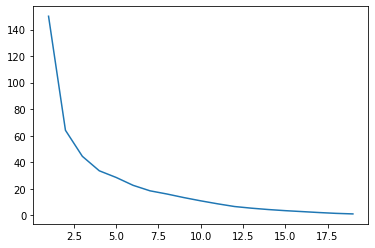

In [26]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i,random_state =0)
    kmeans.fit(val)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,20) , wcss)
plt.show()

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as shs